In [3]:
%matplotlib inline

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee (Septermber 2018) 
#
# Generate input files
#
# Dataset: Pseudomonas aeruginosa gene expression compendium referenced in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5069748/
# 
# Group samples based on gene expression of PA1673
#
# Generate offset vector using extreme gene expression values (train_offset_original):
# average highest gene expression - average lowest gene expression 
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
from scipy.stats import variation
import seaborn as sns
import matplotlib.pyplot as plt

randomState = 123
from numpy.random import seed
seed(randomState)

In [5]:
# Load arguments
data_file = os.path.join(os.path.dirname(os.getcwd()), "data", "all-pseudomonas-gene-normalized.zip")  # repo file is zipped
gene_id = "PA1673"

# Output training
train_highest_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "train_highest_PA1673.txt")
train_lowest_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "train_lowest_PA1673.txt")
train_mid1_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "train_mid1_PA1673.txt")
train_mid2_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "train_mid2_PA1673.txt")
train_input_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "train_model_input.txt.xz")

# Output test
test_lowest_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "test_lowest_PA1673.txt")
test_mid1_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "test_mid1_PA1673.txt")
test_mid2_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "test_mid2_PA1673.txt")
test_highest_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "test_highest_PA1673.txt")

# Output offset
original_offset_file = os.path.join(os.path.dirname(os.getcwd()), "data", "PA1673_full_test", "train_offset_original.txt")

In [6]:
# Read in data
data = pd.read_table(data_file, header = 0, sep = '\t', index_col = 0, compression='zip')
X = data.transpose()
X.shape

(1191, 5549)

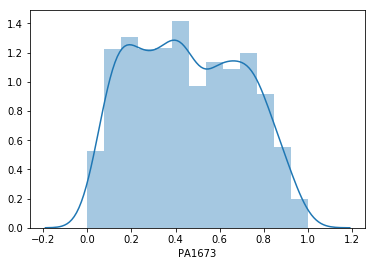

In [7]:
# Plot distirubtion of gene_id gene expression 
sns.distplot(X[gene_id])

In [8]:
# Collect the extreme gene expressions
highest = X[X[gene_id] >= np.percentile(X[gene_id], 95)]
lowest = X[X[gene_id] <= np.percentile(X[gene_id], 5)]

In [9]:
# Checkpoint
print(highest.shape)
print(lowest.shape)

(60, 5549)
(60, 5549)


In [17]:
# Checkpoint
#print(np.percentile(X[gene_id], 95))
#print(highest[gene_id])
#print(np.percentile(X[gene_id], 5))
print(lowest[gene_id])

120330-10978D_23_(Pae_G1a).CEL                 0.071791
120330-10978D_M4_(Pae_G1a).CEL                 0.027608
DC2.CEL                                        0.068697
Glu_6Hour_(Pae_G1a).CEL                        0.000000
GSM1133191_Weiqing_He_D-Glu-2_022410.CEL       0.072930
GSM1191067_sphR-pyr-2.CEL                      0.076990
GSM1267086_HZI1981_G1a.CEL                     0.084342
GSM1267102_HZI1968_Pae_G1a.CEL                 0.085562
GSM1267103_HZI1969_Pae_G1a.CEL                 0.059341
GSM1267104_HZI1970_Pae_G1a.CEL                 0.049060
GSM1267109_HZI1975_G1a.CEL                     0.042902
GSM1267110_HZI1976_G1a.CEL                     0.059627
GSM1267111_HZI1977_G1a.CEL                     0.063059
GSM1267112_HZI1978_G1a.CEL                     0.042610
GSM1267113_HZI1979_G1a.CEL                     0.064405
GSM1420994_anr_control1.CEL                    0.036889
GSM1420995_anr_control2.CEL                    0.048264
GSM1420996_anr_NO1.CEL                         0

In [11]:
# Create dataframes with intermediate gene expression levels
mid_1 = X[(X[gene_id] > np.percentile(X[gene_id], 40)) & (X[gene_id] <= np.percentile(X[gene_id], 50))]
mid_2 = X[(X[gene_id] > np.percentile(X[gene_id], 70)) & (X[gene_id] <= np.percentile(X[gene_id], 80))]

In [14]:
mid_1[gene_id]
#print(np.percentile(X[gene_id], 40))
#print(np.percentile(X[gene_id], 50))

0.1_6hr_CSV86(Pae_G1a).CEL                  0.431393
1_6hr_CSV86(Pae_G1a).CEL                    0.392230
AKGlu_plus_nt_7-8-09_s1.CEL                 0.397391
control1_anaerobic_Pae_G1a.CEL              0.383615
ETJan12B_1380_2012PAO5dR-aero.CEL           0.432787
fos2_anaerobic_Pae_G1a.CEL                  0.398856
FT1aerobic_Pae_G1a.CEL                      0.369642
FT2_aerobic_wdh_Pae_G1a.CEL                 0.406955
FT2_anaerobic_Pae_G1a.CEL                   0.372025
FT3aerobic_Pae_G1a.CEL                      0.421186
GPphhRminus_11-30-09_12-3-09_s1.CEL         0.402124
GSM1067456_PAO1_CK_1.CEL                    0.423994
GSM1141729_PA01_none_PC_.CEL                0.413426
GSM1191066_sphR-pyr-1.CEL                   0.410839
GSM1206646_WT-CHO-2.CEL                     0.404602
GSM1206649_WT-ETC-1.CEL                     0.434105
GSM1206654_dgcA-CHO-2.CEL                   0.376869
GSM1244970_PAO1-37-replicate-01.CEL         0.433192
GSM1244971_PAO1-37-replicate-02.CEL         0.

In [10]:
# Checkpoint
print(mid_1.shape)
print(mid_2.shape)

(119, 5549)
(119, 5549)


In [11]:
# Partition the lowest, mid_1, mid_2, highest into training and test sets
# Training sets will be used to:
# (1) Train the VAE
# (2) Define the offset vectors
# (3) Define the scale factors for the offset

# Test sets will be used in the perturbation analysis

# Split 20% test set randomly
test_set_percent = 0.2
test_lowest = lowest.sample(frac=test_set_percent, random_state = randomState)
test_highest = highest.sample(frac=test_set_percent, random_state = randomState)
test_mid1 = mid_1.sample(frac=test_set_percent, random_state = randomState)
test_mid2 = mid_2.sample(frac=test_set_percent, random_state = randomState)

# Training sets
train_lowest = lowest.drop(test_lowest.index)
train_mid1 = mid_1.drop(test_mid1.index)
train_mid2 = mid_2.drop(test_mid2.index)
train_highest = highest.drop(test_highest.index)

In [12]:
# Create input to VAE using all samples and holding out test sets
input_holdout = (
    X
    .drop(test_lowest.index)
    .drop(test_mid1.index)
    .drop(test_mid2.index)
    .drop(test_highest.index)
)

In [13]:
# Checkpoint
print(X.shape)
print(input_holdout.shape)
print(test_lowest.shape)
print(test_mid1.shape)
print(test_mid2.shape)
print(test_highest.shape)

(1191, 5549)
(1119, 5549)
(12, 5549)
(24, 5549)
(24, 5549)
(12, 5549)


In [14]:
# Define offset vector using all genes
# Average gene expression across samples in training set
train_highest_mean = train_highest.mean(axis=0)
train_lowest_mean = train_lowest.mean(axis=0)

# Generate offset using average gene expression in original dataset
train_offset_original = train_highest_mean - train_lowest_mean
train_offset_original_df = pd.DataFrame(train_offset_original).transpose()
train_offset_original_df

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0,-0.124991,-0.052741,-0.131056,-0.078281,-0.127893,-0.090651,-0.012079,-0.179264,-0.246376,-0.029216,...,-0.157879,-0.072043,-0.078406,-0.136966,-0.117403,-0.005398,-0.06753,-0.180604,-0.106672,-0.083724


In [15]:
# Output training and test sets

# training data
train_highest.to_csv(train_highest_file, sep='\t')
train_mid1.to_csv(train_mid1_file, sep='\t')
train_mid2.to_csv(train_mid2_file, sep='\t')
train_lowest.to_csv(train_lowest_file, sep='\t')
input_holdout.to_csv(train_input_file, sep='\t', compression='xz')

# test data
test_lowest.to_csv(test_lowest_file, sep='\t')
test_mid1.to_csv(test_mid1_file, sep='\t')
test_mid2.to_csv(test_mid2_file, sep='\t')
test_highest.to_csv(test_highest_file, sep='\t')

# original offset
train_offset_original.to_csv(original_offset_file, sep='\t')